In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [2]:
# connection settings
PK = "**************" #zmieniony ze względów bezpieczeństwa
url = "https://westeurope.api.cognitive.microsoft.com/customvision/v3.0/Prediction/5b61d2c4-6362-4c76-894a-4ce36521c0b7/detect/iterations/Iteration2/image"
headers = {"Content-Type":"application/octet-stream",
                        "Prediction-Key": PK}

In [3]:
# return number of people in the picture
def predict_image(image_path, url, headers, threshold, draw=True):
    file = open(image_path,'rb')
    r=requests.post(url=url, headers=headers, data=file)
    preds = r.json()["predictions"]
    
    counter = 0
    for pred in preds:
        if pred["probability"] > threshold:
            counter += 1
    
    if draw:
        im = Image.open(image_path)
        width, height = im.size
        fig,ax = plt.subplots(1)
        ax.imshow(im)
        for pred in preds:
            if pred["probability"] > threshold:
                left = pred["boundingBox"]["left"] * width
                top = pred["boundingBox"]["top"] * height
                w = pred["boundingBox"]["width"] * width
                h = pred["boundingBox"]["height"] * height
                rect = patches.Rectangle((left, top),w ,h ,linewidth=1,edgecolor='r',facecolor='none')
                ax.add_patch(rect)
        ax.set_title("Found {} people".format(counter))
    return counter

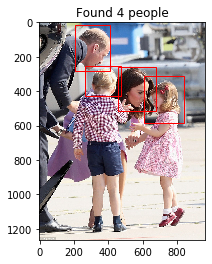

In [4]:
#prediciton arguments
image_path = 'test1.jpg'
threshold = 0.4
num_of_people = predict_image(image_path, url, headers, threshold)

In [5]:
num_of_people

4